# Case Study on the Diamond Dataset

## Information

In this lesson, you'll be working with a dataset regarding the prices and attributes of approximately 54,000 round-cut diamonds. You'll go through the steps of an explanatory data visualization, systematically starting from univariate visualizations, moving through bivariate visualizations, and finally multivariate visualizations. Finally, you'll work on polishing up selected plots from the analysis so that their main points can be clearly conveyed to others.

You can find a copy of the dataset in the Resources tab of the classroom; it will automatically be available to you in the workspaces of this lesson. The dataset consists of almost 54,000 rows and 10 columns:

- price: Price in dollars. Data was collected in 2008.
- carat: Diamond weight. 1 carat is equal to 0.2 grams.
- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).
- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).
- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).
- x, y, z: Diamond length, width, and depth, respectively, in mm.
- table: Ratio of width of top face of diamond to its overall width, as a percentage.
- depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

For the case study, we will concentrate only the variables in the top five bullet points: price and the four 'C's of diamond grade. 

Our focus will be on answering the question: The degree of importance that each of these quality measures has on the pricing of a diamond.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview
Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [3]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [4]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration
1. Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

In [17]:
# find out the bin boundaries
diamonds.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

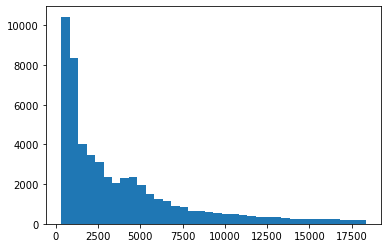

In [19]:
# initial try:
# create a histogram since it is a numeric variable

bin_edges = np.arange(326, 18823, 500)
plt.hist(data=diamonds, x='price', bins=bin_edges);

The diamond price follows a highly skewed distribution. Then we'll try to transform x axis to a log scale:

In [12]:
# find out the log scaled bin boundaries
np.log10(diamonds.price.describe())

count    4.731911
mean     3.594702
std      3.600912
min      2.513218
25%      2.977724
50%      3.380392
75%      3.726258
max      4.274689
Name: price, dtype: float64

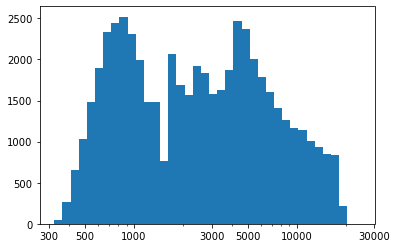

In [6]:
# reform the bin edges
bin_edges = 10 ** np.arange(2.51, 4.28+0.05, 0.05)
plt.hist(data=diamonds, x='price', bins=bin_edges)

# change x axis to a log scale
plt.xscale('log');

# explicitly set the x ticks 
x_ticks = [300, 500, 1000, 3000, 5000, 10000, 30000]
plt.xticks(x_ticks, x_ticks);

you should see that the data is roughly bimodal, with one large peak somewhere between 500 and 1000, and a second large peak between 4 and 5 thousand. The price distribution also seems to just cut off at its maximum, rather than declining in a smooth tail.

2. Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

In [10]:
# figure out the bin boundaries
diamonds.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

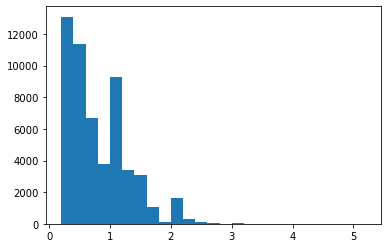

In [15]:
bin_edges = np.arange(0.2, 5.01+0.2, 0.2)
plt.hist(data=diamonds, x='carat', bins=bin_edges);

In [16]:
np.log10(diamonds.carat.describe())

count    4.731911
mean    -0.098030
std     -0.324211
min     -0.698970
25%     -0.397940
50%     -0.154902
75%      0.017033
max      0.699838
Name: carat, dtype: float64

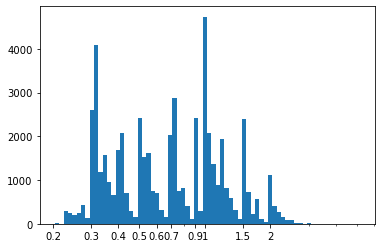

In [100]:
# repeat the same process
# change the tick locations to take a closer look
bin_edges = 10 ** np.arange(-0.69, 0.7+0.02, 0.02)
plt.hist(data=diamonds, x='carat', bins=bin_edges)
plt.xscale('log');
x_ticks = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1, 1.5, 2]
plt.xticks(x_ticks, x_ticks);

You should see an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike. In this case, it's a good idea to set the bin size small (e.g. 0.01) and zoom into a narrower range of values to clearly see the spikes in the data values. Perhaps these spikes come about as part of standard diamond size conventions.

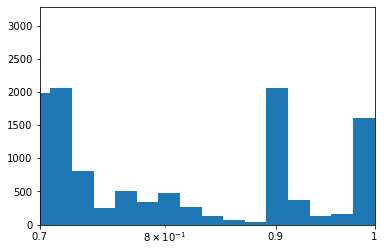

In [98]:
bin_edges = 10 ** np.arange(-0.69, 0.7+0.01, 0.01)
plt.hist(data=diamonds, x='carat', bins=bin_edges)
plt.xscale('log');
# plt.yscale('log');
x_ticks = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1, 1.5, 2]
plt.xticks(x_ticks, x_ticks);

# use .xlim to zoom in
plt.xlim(0.7, 1.0); 

3. Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

Since these features are categorical, you should be producing bar charts here. In addition, since they're ordinal in nature, the bars should be sorted in order of increasing quality level.

In [5]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                                categories=ordinal_var_dict[var])
    diamonds[var] = diamonds[var].astype(ordered_var)

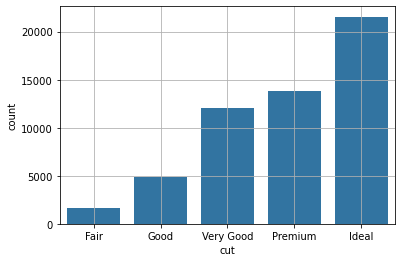

In [124]:
# use the countplot to do this
sb.countplot(data=diamonds, x='cut', color=sb.color_palette()[0]);
plt.grid();

The bar chart should show that the mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.

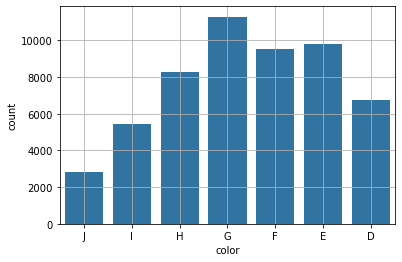

In [114]:
sb.countplot(data=diamonds, x='color', color=sb.color_palette()[0]);
plt.grid()

The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G. 

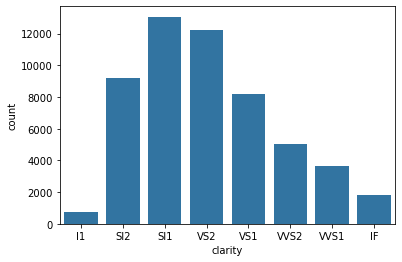

In [111]:
sb.countplot(data=diamonds, x='clarity', color=sb.color_palette()[0]);

There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).

## Biviariate Exploration

Now, we'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

1. To start, construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

Since these are both numeric variables, a scatterplot is a natural choice.

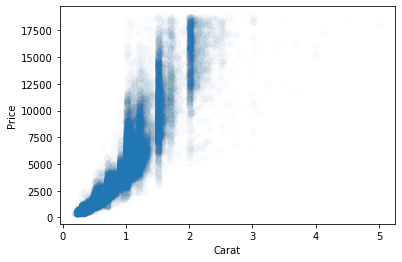

In [210]:
# construct a scatter plot
plt.scatter(data=diamonds, x='carat', y='price', alpha=0.01);
# sb.scatterplot(data=diamonds, x='price', y='carat', alpha=0.1);
plt.xlabel('Carat')
plt.ylabel('Price');

You should recall that the price distribution suggests a logarithmic transformation due to its very long tail.

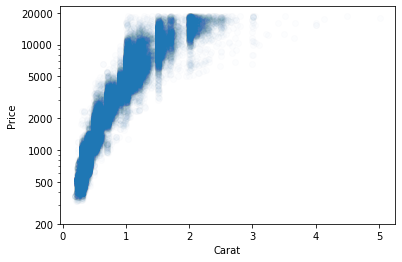

In [211]:
# construct a scatter plot with log scale on price axis
plt.scatter(data=diamonds, x='carat', y='price', alpha=0.01);
# sb.scatterplot(data=diamonds, x='price', y='carat', alpha=0.1);
plt.yscale('log')
plt.xlabel('Carat')
plt.ylabel('Price');
y_ticks = [200, 500, 1000, 2000, 5000, 10000, 20000]
plt.yticks(y_ticks, y_ticks);

The transformation should have changed the scatterplot from looking concave upwards (like an upwards-pointing bowl) to concave downards (like a downwards-pointing bowl). It would be nice to have a linear trend. 

It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value, let's add a transformation to the x-axis to see the approximately linear trend. 

Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow us to see an approximately linear trend.

In [44]:
# user defined cube-root transformation function
def cbrt_trans(x, inverse=False):
    """ transformation helper function """
    if not inverse:
        return np.cbrt(x)
    else:
        return x ** 3

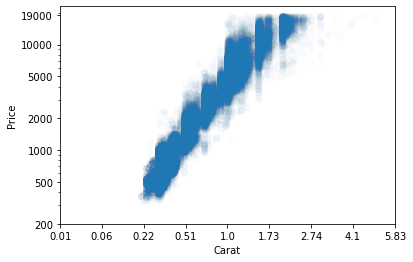

In [213]:
# construct a scatter plot with log scale on price axis
# and transform carat axis to cube-root scale as well
plt.scatter(data=diamonds, x=diamonds['carat'].apply(cbrt_trans), y='price', alpha=0.01);
plt.xlabel('Carat')
plt.ylabel('Price')

plt.yscale('log')
y_ticks = [200, 500, 1000, 2000, 5000, 10000, 19000]
plt.yticks(y_ticks, y_ticks);

x_ticks = np.arange(0.2, cbrt_trans(diamonds['carat'].max())+0.2, 0.2)
plt.xticks(x_ticks, np.round(cbrt_trans(x_ticks, inverse=True).astype(float), 2));

You might also consider a heat map for this task.

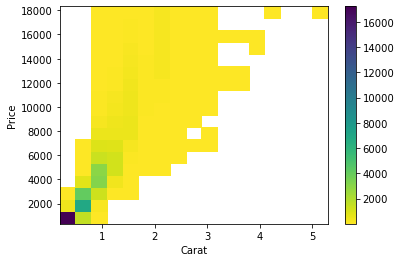

In [212]:
# construct a heat map
bins_x = np.arange(0.2, 5.01+0.3, 0.3)
bins_y = np.arange(326, 18823, 1000)

plt.hist2d(data=diamonds, x='carat', y='price', 
           cmap='viridis_r', 
           cmin=0.01,
           bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel('Carat')
plt.ylabel('Price');

One thing that you might notice in the visualization after transformation is that the trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. 

For diamonds above about 1.5 carats, we'd probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

2. Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

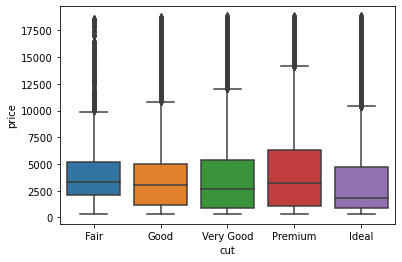

In [7]:
sb.boxplot(data=diamonds, x='cut', y='price');

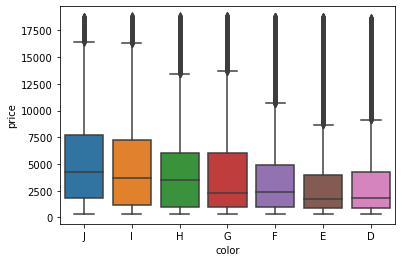

In [8]:
sb.boxplot(data=diamonds, x='color', y='price');

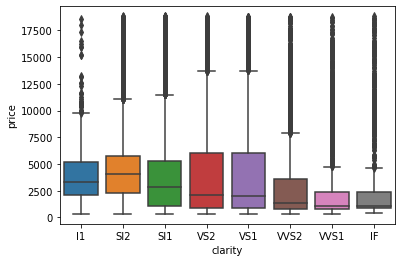

In [9]:
sb.boxplot(data=diamonds, x='clarity', y='price');

You probably noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look. With a violin plot, you can get more insight into what causes the trend in median prices to appear as it does. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


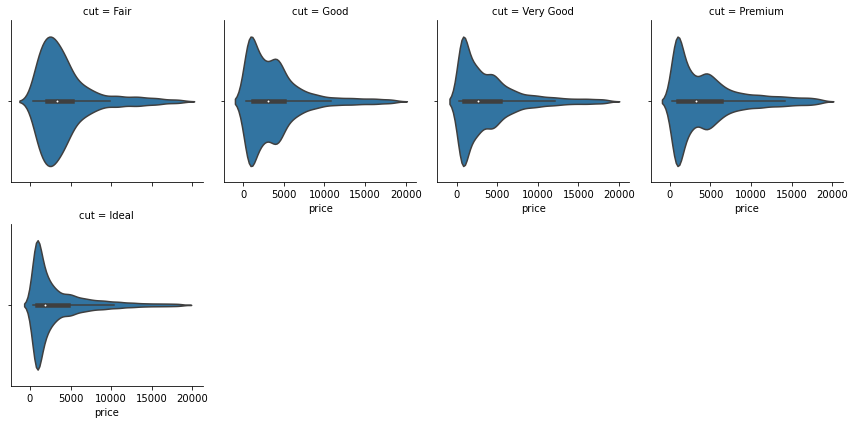

In [21]:
g = sb.FacetGrid(data=diamonds, col='cut', col_wrap=4)
g.map(sb.violinplot, 'price');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


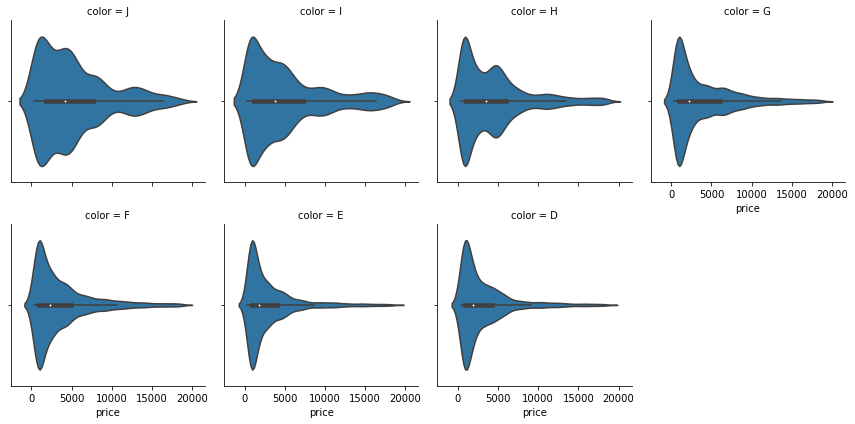

In [14]:
g = sb.FacetGrid(data=diamonds, col='color', col_wrap=4)
g.map(sb.violinplot, 'price');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


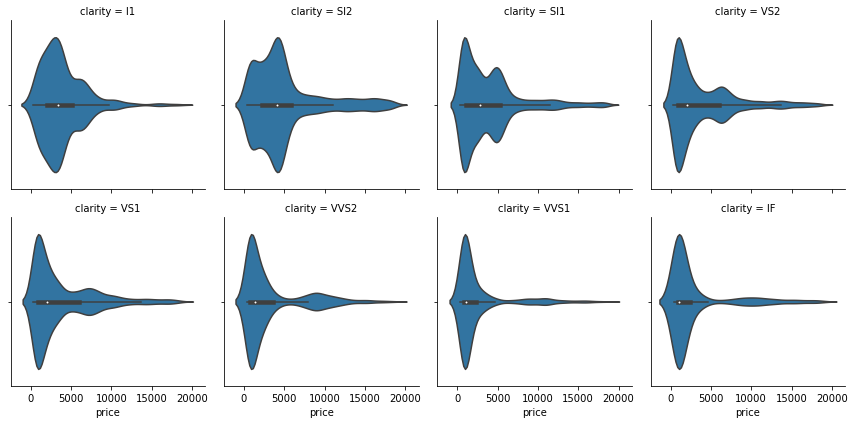

In [13]:
g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=4)
g.map(sb.violinplot, 'price');

Faceted histograms will also produce a similar result.

For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, you should see that the modes rise in price - this should be the expected effect of quality. However, you should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. 

Let's keep searching the data to see if there's more we can say about this pattern.

The point plots show the similar results as shown below.

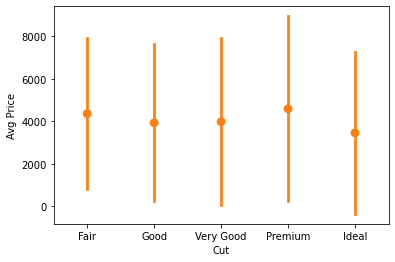

In [245]:
sb.pointplot(data=diamonds, x='cut', y='price', color=sb.color_palette()[1], ci='sd', 
             linestyles='');
plt.xlabel('Cut')
plt.ylabel('Avg Price');

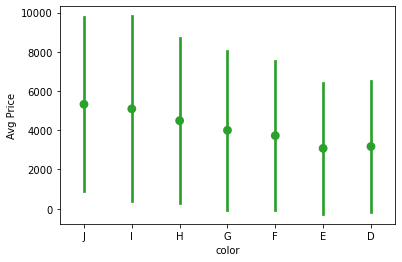

In [246]:
sb.pointplot(data=diamonds, x='color', y='price', color=sb.color_palette()[2], ci='sd',
             linestyles='');
plt.xlabel('color')
plt.ylabel('Avg Price');

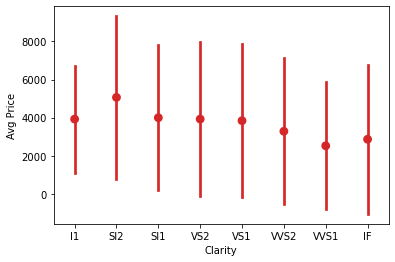

In [247]:
sb.pointplot(data=diamonds, x='clarity', y='price', color=sb.color_palette()[3], ci='sd',
             linestyles='');
plt.xlabel('Clarity')
plt.ylabel('Avg Price');

3. Before we complete the bivariate exploration, we should take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? You can take the same approach as the above investigation of price against the three categorical quality measures. What can you see in these plots, and how does this relate to your earlier investigations?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


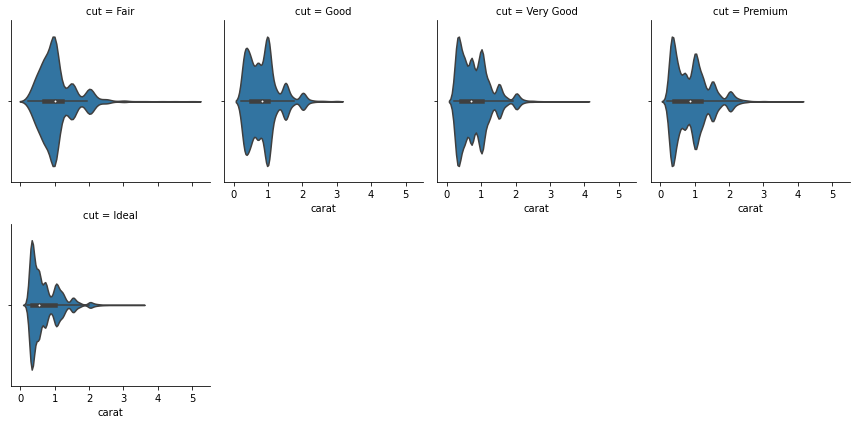

In [27]:
g = sb.FacetGrid(data=diamonds, col='cut', col_wrap=4)
g.map(sb.violinplot, 'carat');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


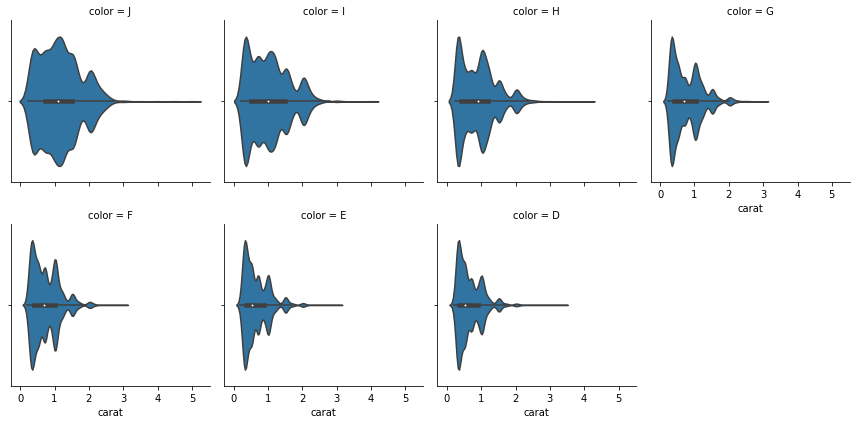

In [28]:
g = sb.FacetGrid(data=diamonds, col='color', col_wrap=4)
g.map(sb.violinplot, 'carat');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


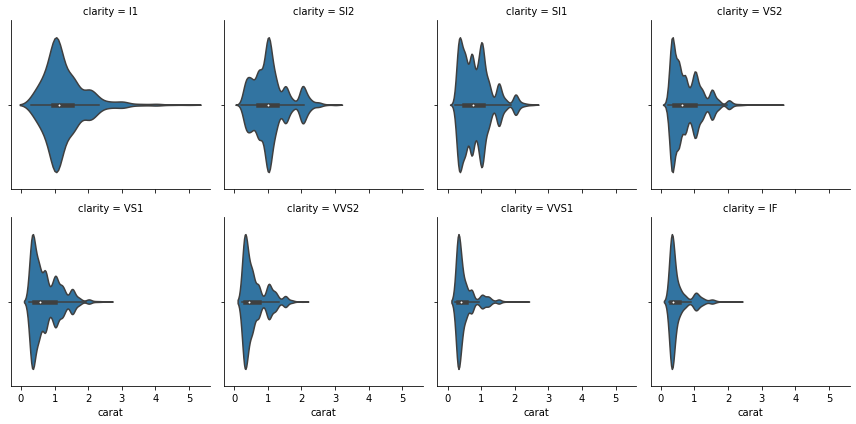

In [20]:
g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=4)
g.map(sb.violinplot, 'carat');

These plots should shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price.

## Multivariate Exploration

The goal of this exercise will be to depict these interaction effects through the use of multivariate plots.

1. To start off with, create a plot of the relationship between price, carat, and clarity. In the previous workspace, you saw that clarity had the clearest interactions with price and carat. How clearly does this show up in a multivariate visualization?

With two numeric variables and one categorical variable, there are two main plot types that make sense. A scatterplot with points colored by clarity level makes sense on paper, but the sheer number of points causes overplotting that suggests a different plot type. A faceted scatterplot or heat map is a better choice in this case.

In [56]:
# create a new variable for the scaling later
diamonds['carat_cbrt'] = cbrt_trans(diamonds.carat)
diamonds.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_cbrt
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.612693


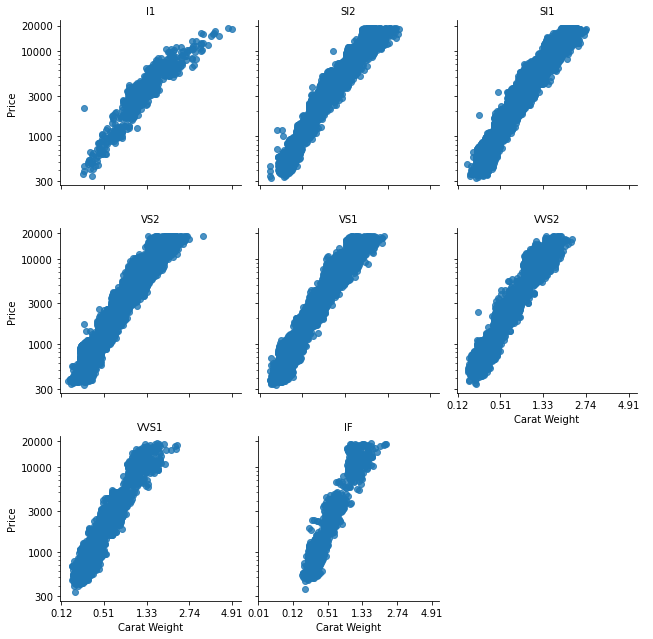

In [63]:
g = sb.FacetGrid(data=diamonds, col='clarity', col_wrap=3)

# note use of 'carat_cbrt' variable instead of 'carat'
g.map(sb.regplot, 'carat_cbrt', 'price', x_jitter=0.04, fit_reg=False)

# transform y axis, relocate the tick marks
plt.yscale('log');
y_ticks = [300, 1000, 3000, 10000, 20000]
plt.yticks(y_ticks, y_ticks)

# change the x ticks locs and labels
x_ticks = np.arange(0.2, 
                    diamonds['carat_cbrt'].max()+0.1, 0.3)
plt.xticks(x_ticks, 
           np.round(cbrt_trans(x_ticks, inverse=True).astype(float), 2));

g.add_legend();
g.set_xlabels('Carat Weight')
g.set_ylabels('Price')
g.set_titles('{col_name}');

You should see across facets the general movement of the points upwards and to the left, corresponding with smaller diamond sizes, but higher value for their sizes.

2. Let's try a different plot, for diamond price against cut and color quality features. To avoid the trap of higher quality grades being associated with smaller diamonds, and thus lower prices, we should focus our visualization on only a small range of diamond weights. For this plot, select diamonds in a small range around 1 carat weight. Try to make it so that your plot shows the effect of each of these categorical variables on the price of diamonds.

There's a lot of ways that you could plot one numeric variable against two categorical variables. 

I think that the clustered box plot or the clustered point plot are the best choices in this case. With the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. 

A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well.

In [88]:
# make a subset of "diamonds"
d_sub = diamonds[(diamonds.carat >=0.8) & (diamonds.carat <= 1.2)]
d_sub.shape

(13658, 11)

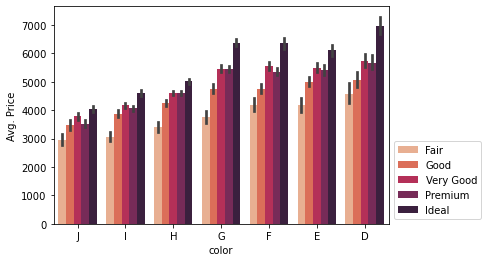

In [106]:
sb.barplot(data=d_sub, 
           x='color', 
           y='price', 
           hue='cut',
           palette='rocket_r')
plt.legend(loc=3, bbox_to_anchor=(1, 0));
plt.ylabel('Avg. Price');

On the other hand, we could also use seaborn's `pointplot`:

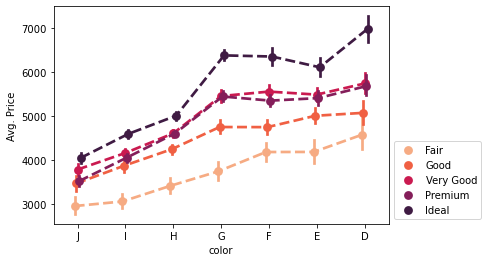

In [109]:
sb.pointplot(data=d_sub, 
             x='color', 
             y='price', 
             hue='cut',
             palette='rocket_r',
             dodge=True, linestyles="--")
plt.legend(loc=3, bbox_to_anchor=(1, 0));
plt.ylabel('Avg. Price');

Assuming you went with a clustered plot approach, you should see a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable. Aesthetically, did you remember to choose a sequential color scheme for whichever variable you chose for your third variable, to override the default qualitative scheme? If you chose a point plot, did you set a dodge parameter to spread the clusters out?

### Explanatory Polishing